In [123]:
import requests
import pandas
import math
import datetime
from collections import Counter
import json
import seaborn as sns
%matplotlib inline  


In [130]:
URL = "https://vc.ru/helper/news?count=%d&offset=%d"
def load_news_batch(offset):
    resp = requests.get(URL % (20, offset))
    data = resp.json()
    return data['items']

In [136]:
def load_news(size):
    offsets = list(range(0, size, 20))
    news = []
    for offset in offsets:
        print ("Loading 20 last news starting from %d\r" % offset),
        news += load_news_batch(offset)
        
    print ("Loaded %d succesfully!                       "% size)
    return news

In [143]:
def build_data_frame(size):
    news = load_news(size)
    df = pandas.DataFrame(news)
    filtered = map(lambda x: int(x.replace(' ', '')), df['hits_beauty'])
    df['hits'] = list(filtered)
    date_diff = list(map(lambda x: abs(x), df['date'].diff()))
    date_diff.pop(0)
    df = df[:-1]
    df['date_diff'] = date_diff
    df['day'] = list(map(lambda t: datetime.datetime.fromtimestamp(t).weekday(), df['date']))
    df['index'] = range(len(df), 0, -1)
    return df

In [159]:
def plot_data(data, title=''):
    g = sns.lmplot(x="date", y="index", 
               data=data,palette="muted", 
               scatter_kws={"s": 5, "alpha": 1, 'color':'#9ebcda'}, 
               line_kws={'color': '#8856a7'})
    g.fig.suptitle(title)
    

In [133]:
df = build_data_frame(10000)

In [138]:
sns.set(style="ticks")

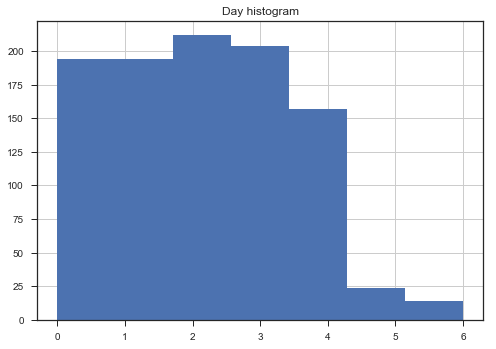

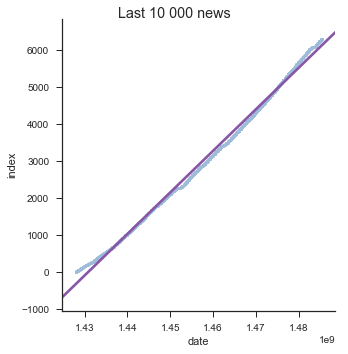

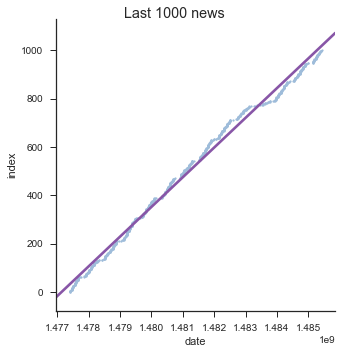

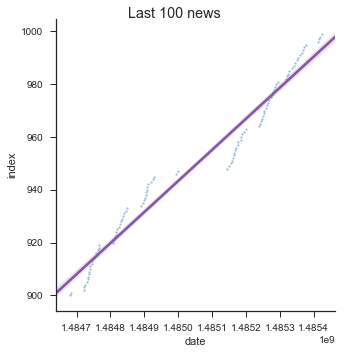

In [161]:
h = df['day'].hist(bins=7)
h.set_title('Day histogram')
plot_data(df, 'Last 10 000 news')
plot_data(df[0:1000], 'Last 1000 news')
plot_data(df[0:100], 'Last 100 news')

**О чем говорит наклон графика линейной модели?**

Наклон графика линейной модели говорит о том, как часто публикуются новости. Чем больше наклон, тем чаще выходят новости. По сути наклон — соотношение новостей / еденицу времени.

**Как он соотносится с результатами полученными вами в предыдущем домашнем задании?**

Мы можем предположить, сколько будет опубликовано новостей, через месяц или неделю.
Я бы сказал, что недостаточно коэфициента частоты публикации новостей, чтобы узнать когда будет опубликована следующий материал.

**Хорошо ли линейная аппроксимация подходит для ваших данных или видны систематические отклонения?**

Линейная аппроксимация не очень хорошо подходит для моих данных, видны систематические отклонения, когда новостей выходит очень мало. 
Это происходит ночью(небольшие перерывы на графике 100 новостей) и на выходных(разрыв в центре графика из 100 новостей)
Наша модель не очень хорошо предсказывает точное количество новостей, из-за суточных колебаний и выходных дней.
Также видно, на больших обьемах данных, что есть определеные периоды, когда новости публикуются чаще или реже.


